In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dtdf = pd.read_csv('../processed-data/processed-data.csv')
dtdf.head()

,Unnamed: 0,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
0,0,23,12,19114.12,3,3,4,7.0,1,1.0,26.822620,22.0833,0,49.574949,4.387204,3,312.494089,2.0,-616.432092,-13.474437
1,1,23,12,19114.12,3,3,4,14.0,1,2.0,31.944960,0.0000,0,49.574949,4.773057,4,284.629162,2.0,-616.461504,-17.472881
2,3,23,12,19114.12,3,3,4,4.0,1,2.0,31.377862,22.3333,0,49.574949,5.295604,6,223.451310,2.0,-616.410033,-10.475604
3,4,23,12,19114.12,3,3,4,14.0,1,2.0,24.797347,22.4167,0,49.574949,3.723768,2,341.489231,2.0,-616.400608,-8.530153
4,5,23,12,19114.12,3,3,4,4.0,1,2.0,27.262259,22.5000,0,49.574949,4.134049,0,340.479212,2.0,-616.432092,-13.474437


In [3]:
dtdf.shape

(97230, 20)

In [4]:
dtdf.dtypes

Unnamed: 0                    int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Num_Bank_Accounts             int64
Interest_Rate                 int64
Num_of_Loan                   int64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries          int64
Credit_Mix                  float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                float64
pca_component_1             float64
pca_component_2             float64
dtype: object

In [5]:
dtdf.drop(columns=['Unnamed: 0','Amount_invested_monthly'],axis = 1,inplace=True)


Splitting Data into training and testing sets

In [6]:
feature_cols = ['Age','Occupation','Annual_Income','Num_Bank_Accounts','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_Mix','Credit_Utilization_Ratio','Credit_History_Age','Payment_of_Min_Amount','Total_EMI_per_month','Payment_Behaviour','Monthly_Balance','pca_component_1','pca_component_2']
X = dtdf[feature_cols]
Y = dtdf.Credit_Score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Building Decision Tree Model

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

In [37]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.6655353286022833


In [9]:
y_pred

array([2., 2., 1., ..., 1., 0., 1.])

confusion matrix heatmap for 97230 records:


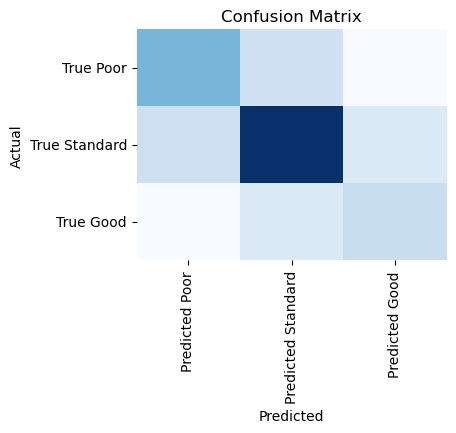

In [10]:
def confusion_matrix_display(actual,predicted,n):
    conf_matrix =confusion_matrix(actual, predicted)
    print(f"confusion matrix heatmap for {n} records:")
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poor', 'Predicted Standard','Predicted Good'],
            yticklabels=['True Poor', 'True Standard','True Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
confusion_matrix_display(Y_test,y_pred,97230)

In [43]:
columns = ['Accuracy','Precision', 'Recall', 'F1-score']
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test,y_pred,average = 'weighted')
f1 = f1_score(Y_test,y_pred,average = 'weighted') 
recall = recall_score(Y_test,y_pred,average = 'weighted')
l1 = [accuracy,precision,f1,recall]
data = []
data.append(l1)
scores_df = pd.DataFrame(columns=columns,data=data)
scores_df

,Accuracy,Precision,Recall,F1-score
0,0.665535,0.665733,0.665629,0.665535


### Visualizing the Decision Tree

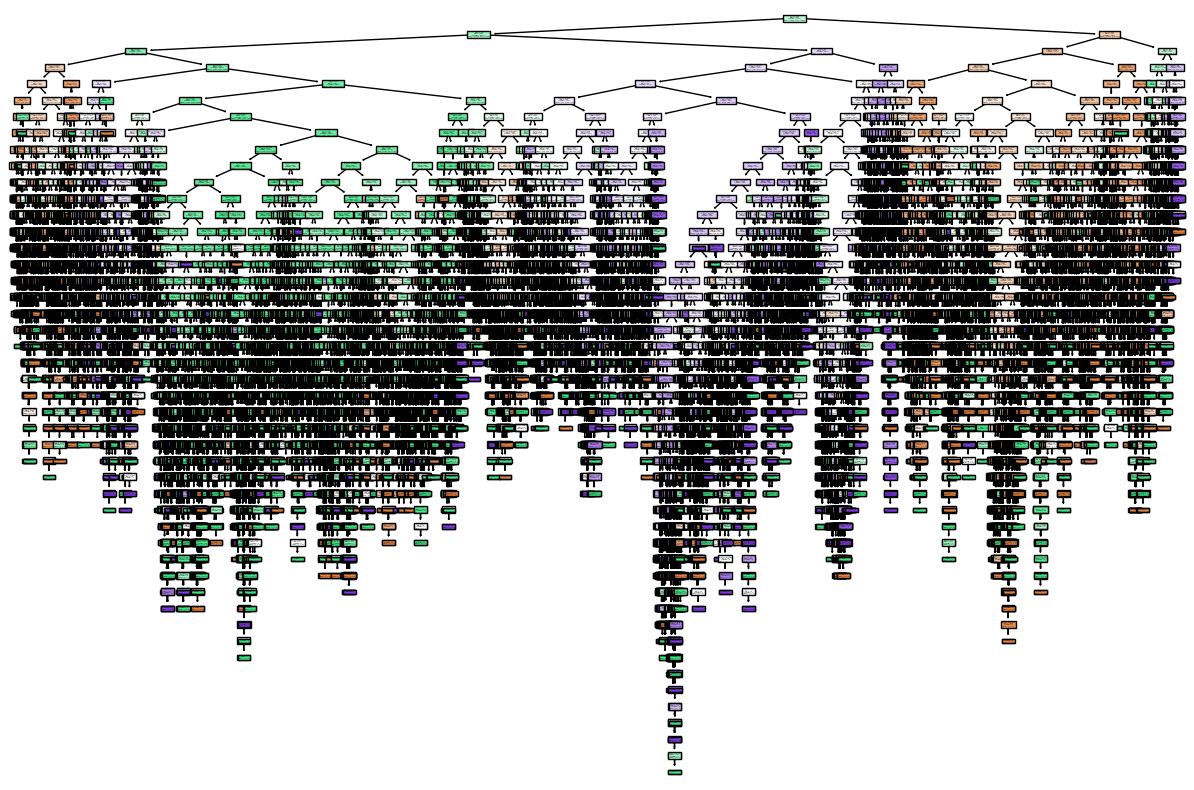

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
m = ['Credit_Score']
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,filled=True)

### HYPERPARAMETER TUNING

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10,15,18,20,None],
    'min_samples_split': [2,3,4,6],
    'min_samples_leaf': [1,2,3,4]
}
dtree_class = DecisionTreeClassifier(random_state=42) # Initialize a decision tree classifier
grid_search = GridSearchCV(dtree_class,param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f"Best Parameters (Grid Search): {best_params_grid}")
print(f"Best Score (Grid Search): {best_score_grid}")


Best Parameters (Grid Search): {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (Grid Search): 0.6639926377956341


In [45]:
# Calculate accuracy using X_test
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.6701635297747609
